# Fast Food Marketing Campaign A\B Test

## Scenario

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

## Goal

Evaluate A/B testing results and decide which marketing strategy works the best.

## Dataset

This is an open source dataset taken from [Kaggle.com](https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test)
- __MarketID__: unique identifier for market
- __MarketSize__: size of market area by sales
- __LocationID__: unique identifier for store location
- __AgeOfStore__: age of store in years
- __Promotion__: one of three promotions that were tested
- __Week__: one of four weeks when the promotions were run
- __SalesInThousands__: sales amount for a specific LocationID, Promotion, and week

## A/B Testing

There are seven steps that are generally followed while performing A/B testing - 
1) Understand business objective
2) Set hypothesis testing parameters such as null and alternative hypothesis. Significance level and power of the test
3) Design of experiment, that is, choosing randomization unit and target population
4) Running the experiments and collection of data
5) Validity checks on the collected data
6) Interpret Results
7) Take launch decision based on the results observed

# Step 1 -  Business Objective

The fast-food business aims to introduce new products to remain competitive, and we need to evaluate the impact of three different marketing campaigns on weekly sales. For this analysis, the primary success metric is `weekly sales`, and the experiment is conducted at the `market size` using a randomized approach.

# Step 2 - Hypothesis Testing

We now need to define the parameters for hypothesis testing, as we are examining the difference in weekly sales across three marketing campaigns.

- **Null Hypothesis (H0)**: There is no significant difference in the mean weekly sales among the three marketing campaigns.
- **Alternative Hypothesis (H1)**: There is a significant difference in the mean weekly sales among the three marketing campaigns.

We set the significance level at 5% and the test power at 80%.

# Step 3 - Experiment Design

The experiment targets customers who purchase fast food, with randomization conducted at the market level.

# Step 4 - Run the Experiment

This step has been taken care of and we have the data from the experiement. Now we move on to analyze this data and interpret the results

# Step 5 - Validating Checks

## Libraries Installation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import chi2_contingency
from scipy.stats import levene, bartlett
from scipy.stats import shapiro
from scipy.stats import t
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import functions as func
import utilities as visuals

## Data Retrieval

In [2]:
fast_food = pd.read_csv("WA_Marketing-Campaign.csv")
print(fast_food.shape)
fast_food.head()

(548, 7)


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [3]:
fast_food.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

## Data Cleaning

In [4]:
fast_food.isna().any().any()

False

No missing Values

In [5]:
fast_food.duplicated().any()

False

No Duplicate Values

## Exploratory Data Analysis

### Understanding Data

#### Descriptive statistics overview

In [6]:
fast_food.describe().T

,count,mean,std,min,25%,50%,75%,max
MarketID,548.0,5.715328,2.877001,1.00,3.000,6.0,8.0000,10.00
LocationID,548.0,479.656934,287.973679,1.00,216.000,504.0,708.0000,920.00
AgeOfStore,548.0,8.503650,6.638345,1.00,4.000,7.0,12.0000,28.00
Promotion,548.0,2.029197,0.810729,1.00,1.000,2.0,3.0000,3.00
week,548.0,2.500000,1.119055,1.00,1.750,2.5,3.2500,4.00
SalesInThousands,548.0,53.466204,16.755216,17.34,42.545,50.2,60.4775,99.65


#### Number of MarketID and LocationID

In [7]:
fast_food['MarketID'].nunique()

10

In [8]:
fast_food['LocationID'].nunique()

137

## Sample size and proportions overview

In [9]:
# How many stores were attributed to each promotion
location_counts = fast_food.groupby('Promotion')['LocationID'].nunique() 

# Total number of weeks of data per promotion
week_counts = fast_food.groupby('Promotion')['week'].count()

# Total number of unique markets per promotion
market_counts = fast_food.groupby('Promotion')['MarketID'].nunique()

summary = pd.DataFrame({
    'Unique Locations': location_counts,
    'Weeks of Data': week_counts,
    'Unique Markets': market_counts
})

summary

,Unique Locations,Weeks of Data,Unique Markets
Promotion,,,
1,43,172,10
2,47,188,9
3,47,188,10


In [10]:
fast_food.groupby(['Promotion']).describe().T

Promotion                        1           2           3
MarketID         count  172.000000  188.000000  188.000000
                 mean     5.790698    5.893617    5.468085
                 std      2.993624    2.897419    2.742816
                 min      1.000000    1.000000    1.000000
                 25%      3.000000    4.000000    3.000000
                 50%      6.000000    6.000000    6.000000
                 75%      8.000000    9.000000    8.000000
                 max     10.000000   10.000000   10.000000
LocationID       count  172.000000  188.000000  188.000000
                 mean   488.465116  497.446809  453.808511
                 std    299.352389  290.158047  274.555052
                 min      3.000000    2.000000    1.000000
                 25%    218.000000  301.000000  206.000000
                 50%    512.000000  502.000000  501.000000
                 75%    711.000000  802.000000  705.000000
                 max    919.000000  920.000000  917.000000
AgeOfStore       count  172.000000  188.000000  188.000000
                 mean     8.279070    7.978723    9.234043
                 std      6.636160    6.597648    6.651646
                 min      1.000000    1.000000    1.000000
                 25%      3.000000    3.000000    5.000000
                 50%      6.000000    7.000000    8.000000
                 75%     12.000000   10.000000   12.000000
                 max     27.000000   28.000000   24.000000
week             count  172.000000  188.000000  188.000000
                 mean     2.500000    2.500000    2.500000
                 std      1.121298    1.121019    1.121019
                 min      1.000000    1.000000    1.000000
                 25%      1.750000    1.750000    1.750000
                 50%      2.500000    2.500000    2.500000
                 75%      3.250000    3.250000    3.250000
                 max      4.000000    4.000000    4.000000
SalesInThousands count  172.000000  188.000000  188.000000
                 mean    58.099012   47.329415   55.364468
                 std     16.553782   15.108955   16.766231
                 min     30.810000   17.340000   22.180000
                 25%     46.352500   38.170000   44.197500
                 50%     55.385000   45.385000   51.165000
                 75%     63.617500   51.745000   61.732500
                 max     99.650000   88.640000   96.480000

### Sample Ratio Mismatch Check

In [11]:
observed_counts = fast_food['Promotion'].value_counts().values

# Calculate expected proportions (assuming equal allocation to promotions)
total_samples = observed_counts.sum()
num_promotions = len(observed_counts)
expected_counts = [total_samples / num_promotions] * num_promotions

chi2_stat, p_value, dof, expected = chi2_contingency([observed_counts, expected_counts])

print(f"Observed Counts: {observed_counts}")
print(f"Expected Counts: {expected_counts}")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Sample Ratio Mismatch detected")
else:
    print("No Sample Ratio Mismatch detected")

Observed Counts: [188 188 172]
Expected Counts: [182.66666666666666, 182.66666666666666, 182.66666666666666]
Chi-Square Statistic: 0.4742792232379511
P-value: 0.7888811433554481
No Sample Ratio Mismatch detected


### Visualization

#### Explore Data at Promotion Level

In [12]:
count_df = fast_food['Promotion'].value_counts().sort_index().to_frame('Count').reset_index()
count_df.columns = ['Promotion', 'Count']

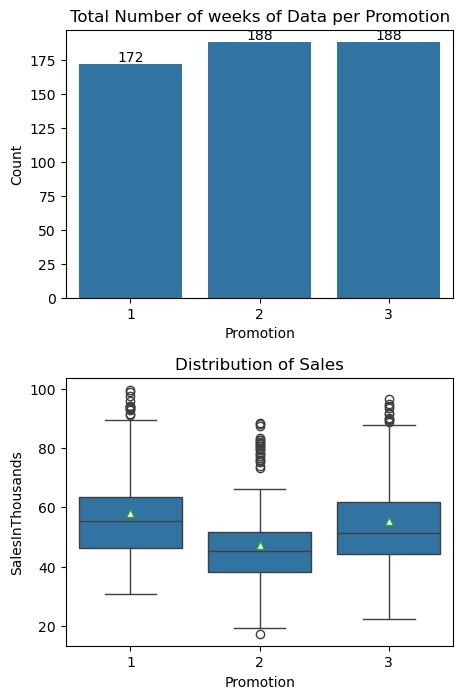

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5, 8))

sns.barplot(y = 'Count', x = 'Promotion', data = count_df, ax = ax1)

for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Total Number of weeks of Data per Promotion')

sns.boxplot(y = 'SalesInThousands', x = 'Promotion', data = fast_food,
            showmeans = True, meanprops = {'markerfacecolor': 'white'}, ax = ax2)
ax2.set_title('Distribution of Sales')
fig.subplots_adjust(hspace = 0.3)

We can see that the distribution of sales with promotions 1 and 3 is higher

#### Explore data at market level

In [14]:
count_df2 = fast_food.groupby(['MarketSize', 'Promotion'])['MarketID'].count().reset_index()
count_df2.columns = ['MarketSize', 'Promotion', 'Count']
count_df2

,MarketSize,Promotion,Count
0,Large,1,56
1,Large,2,64
2,Large,3,48
3,Medium,1,96
4,Medium,2,108
5,Medium,3,116
6,Small,1,20
7,Small,2,16
8,Small,3,24


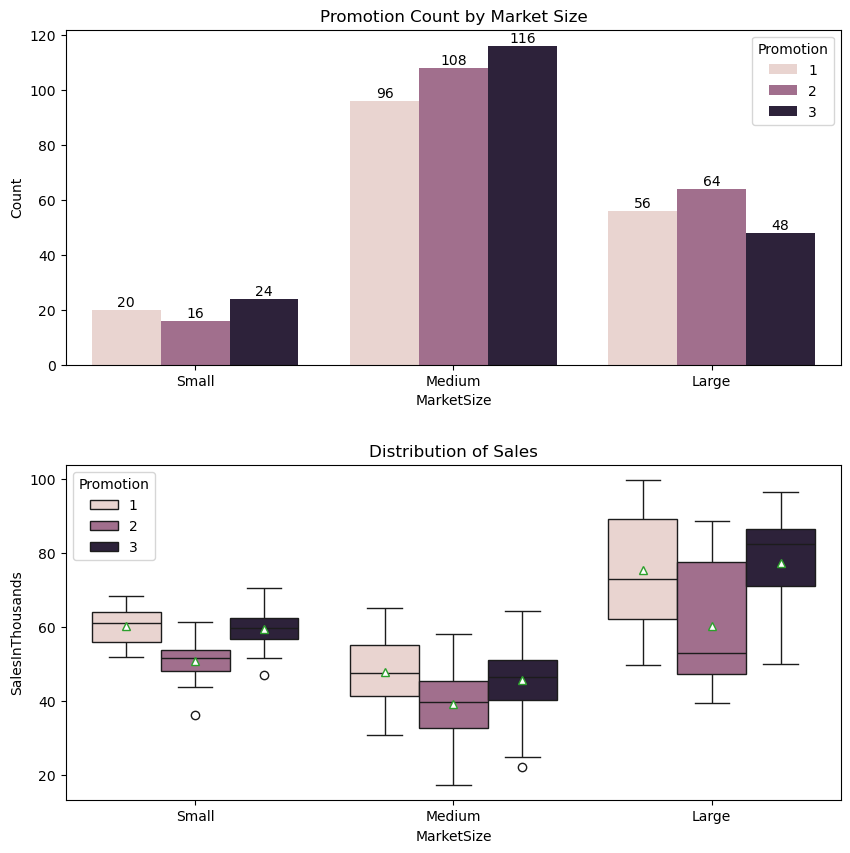

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(y = 'Count', x = 'MarketSize', hue = 'Promotion', data = count_df2,
            order = ['Small', 'Medium', 'Large'], ax = ax1)

for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Promotion Count by Market Size')

sns.boxplot(y = 'SalesInThousands', x = 'MarketSize', hue = 'Promotion', data = fast_food,
            order = ['Small', 'Medium', 'Large'], showmeans = True,
            meanprops = {'markerfacecolor': 'white'}, ax = ax2)

ax2.set_title('Distribution of Sales')
fig.subplots_adjust(hspace = 0.3)

- Sales performance is evaluated across market sizes and promotion types.  -
- A similar trend is observed across different markets, offering early insights into the potential direction of the analysis.  
- Notably, Promotions 1 and 3 show an increase in mean sales, while Promotion 2 appears to be relatively less effective.  
- Larger markets demonstrate higher median sales and a broader range of outcomes compared to smaller markets.  
- Medium and small markets exhibit less variability in sales; however, the influence of promotion types is evident, with some promotions yielding stronger sales results.  

Relying solely on boxplots to draw conclusions may not be sufficient for credibility. To strengthen our analysis, an ANOVA test can be performed to assess the statistical significance of the differences in means across the promotions.

Prior to conducting the ANOVA test, it is necessary to satisfy three assumptions regarding the data:

1) All groups must be independent of each other, and the data should not be based on repeated measurements.

2) The responses, i.e., the data, should follow a normal distribution.

3) The variances of all groups must be comparable, i.e., approximately equal.

For the purpose of simplicity, we have made the assumption that the data follows a normal distribution. However, if this assumption is not met, an alternative statistical test, known as the Kruskal-Wallis test, can be employed. This test may be considered as an equivalent of the ANOVA test, but without the normal distribution assumption for the data.

### Analysis by Promotion  
**Objective:**  
To accurately define the target metric and select appropriate statistical tests, it is crucial to first explore the features and their relationships, particularly in the context of the three promotions.  

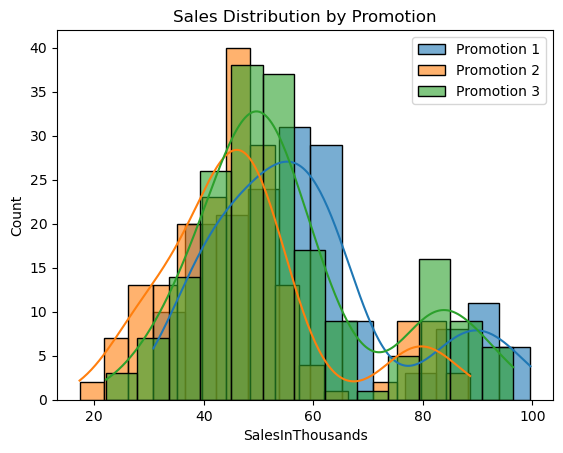

Promotion 1: p-value=1.97726450444774e-08
Data is not normal.
Promotion 2: p-value=5.457099666274281e-09
Data is not normal.
Promotion 3: p-value=1.49946592611918e-08
Data is not normal.


In [16]:
# Visual inspection of distributions per promotion
for promotion, group in fast_food.groupby('Promotion'):
    sns.histplot(group['SalesInThousands'], kde=True, label=f'Promotion {promotion}', alpha=0.6)
plt.legend()
plt.title('Sales Distribution by Promotion')
plt.show()

# Shapiro-Wilk test for each promotion
for promotion, group in fast_food.groupby('Promotion'):
    stat, p_value = shapiro(group['SalesInThousands'])
    print(f'Promotion {promotion}: p-value={p_value}')
    if p_value > 0.05:
        print("Data is approximately normal.")
    else:
        print("Data is not normal.")


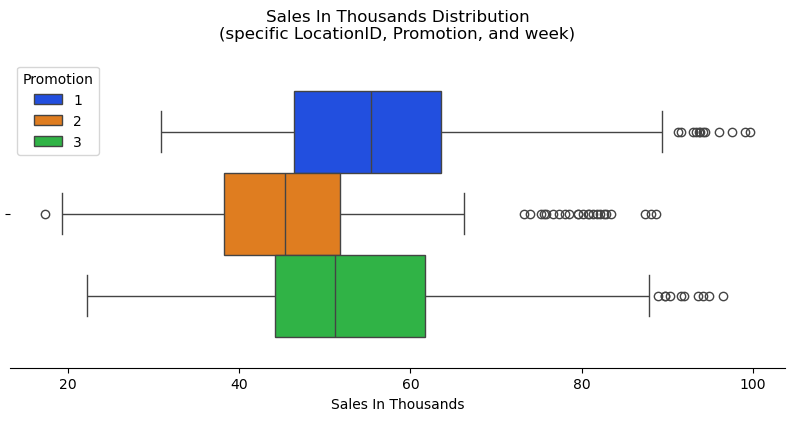

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=fast_food, x='SalesInThousands', hue='Promotion',
             palette=sns.color_palette('bright', n_colors=3))
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xlabel('Sales In Thousands')
plt.title('Sales In Thousands Distribution\n(specific LocationID, Promotion, '
          'and week)', pad=15)
plt.show()

This box plot shows the distribution of Sales in Thousands for three promotions. Promotion 1 has the highest median sales but also the highest variability, with a wide IQR and many upper outliers. Promotion 2 has the lowest median and narrower IQR, indicating more consistent but lower sales. Promotion 3 falls in between, with moderate variability and fewer extreme outliers compared to Promotion 1.

In [18]:
promotion_details = fast_food.groupby(['Promotion']).describe()
promotion_details.SalesInThousands

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


- The sales distributions for all three promotions are bimodal, differing in their means and variances.  
- Promotion 2 exhibits the lowest mean and median, along with the smallest standard deviation and interquartile range (IQR).  
- In contrast, Promotion 1 appears to generate the highest sales but also shows the greatest variability and less distinct peaks.  

### Sales in Thousands per Week  

To investigate whether the bimodal distribution of sales is influenced by variations in sales across different weeks, a plot of **Sales in Thousands by Week** is created. This analysis helps identify potential trends or patterns in weekly sales data that may explain the observed distribution.  

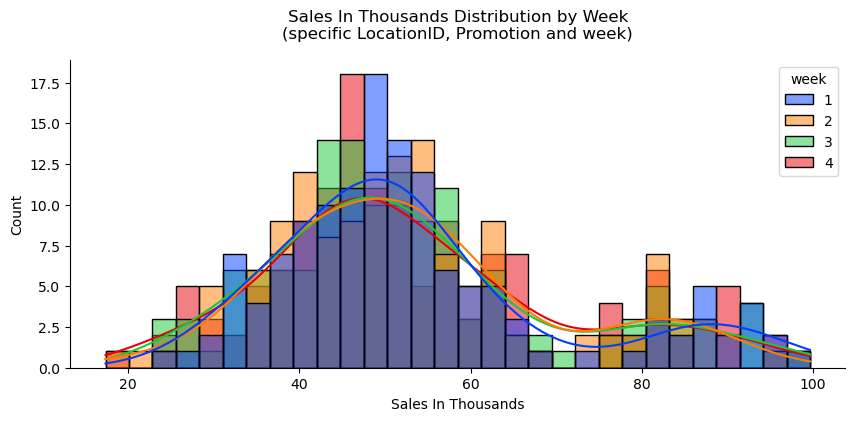

In [19]:
plt.figure(figsize=(10, 4))
sns.histplot(data=fast_food, x='SalesInThousands', hue='week', bins=30,
             palette=sns.color_palette('bright', n_colors=4), kde=True)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('Sales In Thousands')
plt.title('Sales In Thousands Distribution by Week\n(specific LocationID, '
          'Promotion and week)', pad=15)
plt.show()

The sales distribution remains bimodal across different weeks, indicating that the observed bimodal pattern is not due to variations in sales by week.

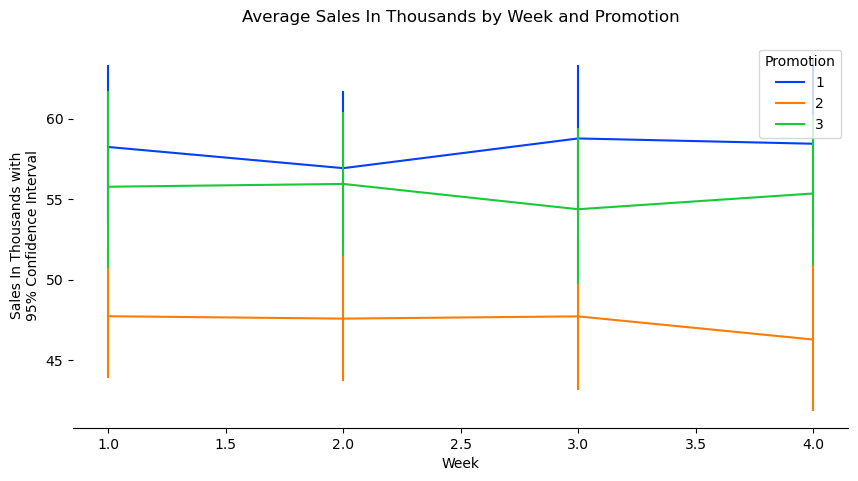

In [20]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=fast_food, x='week', y='SalesInThousands', hue='Promotion',
             palette=sns.color_palette('bright', n_colors=3), err_style='bars',
             errorbar=('ci', 95))
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xlabel('Week')
plt.ylabel('Sales In Thousands with\n95% Confidence Interval')
plt.title('Average Sales In Thousands by Week and Promotion', pad=15)
plt.show()

In [21]:
promotion_week_details = fast_food.groupby(['week', 'Promotion']).describe()
promotion_week_details.SalesInThousands

count       mean        std    min     25%    50%     75%  \
week Promotion                                                              
1    1           43.0  58.244419  16.798929  35.30  48.740  53.79  62.245   
     2           47.0  47.730213  14.387406  27.81  38.965  46.02  50.645   
     3           47.0  55.776170  18.071909  24.75  45.850  51.01  59.705   
2    1           43.0  56.929535  16.553088  35.86  42.635  55.11  62.855   
     2           47.0  47.582553  14.854098  17.34  38.885  45.75  52.050   
     3           47.0  55.949149  15.643490  22.18  48.495  53.47  61.215   
3    1           43.0  58.774884  16.423121  32.05  48.030  56.19  64.090   
     2           47.0  47.722128  15.979831  23.93  37.395  45.35  52.540   
     3           47.0  54.377872  17.219269  29.03  43.120  50.55  61.565   
4    1           43.0  58.447209  16.962984  30.81  47.005  56.84  64.500   
     2           47.0  46.282766  15.604704  19.26  36.625  44.84  52.190   
     3           47.0  55.354681  16.535599  26.68  44.815  50.05  63.155   

                  max  
week Promotion         
1    1          99.65  
     2          88.64  
     3          96.48  
2    1          96.01  
     2          82.86  
     3          90.30  
3    1          99.12  
     2          88.12  
     3          93.63  
4    1          97.61  
     2          80.75  
     3          94.21

The values for Promotion 1 and Promotion 3 may not show a true significant difference, as their confidence intervals overlap and they have larger standard deviations.

The 95% confidence intervals produced by Seaborn's Lineplot are generated using the bootstrapping method.

In [22]:
# Levene's Test
stat, p_value = levene(
    *[group['SalesInThousands'].values for _, group in fast_food.groupby('Promotion')]
)
print(f"Levene's Test p-value: {p_value}")
if p_value > 0.05:
    print("Variances are approximately equal.")
else:
    print("Variances are significantly different.")

# Bartlett’s Test
stat, p_value = bartlett(
    *[group['SalesInThousands'].values for _, group in fast_food.groupby('Promotion')]
)
print(f"Bartlett’s Test p-value: {p_value}")
if p_value > 0.05:
    print("Variances are approximately equal.")
else:
    print("Variances are significantly different.")


Levene's Test p-value: 0.2817514565692118
Variances are approximately equal.
Bartlett’s Test p-value: 0.3114189687247507
Variances are approximately equal.


### Statistical Tests

#### Assumption Checking
- The sample sizes for Promotions 1, 2, and 3 were found to be sufficiently large (172, 188, and 188, respectively), which supports the application of the Central Limit Theorem.
- The independence of the promotions was verified, confirming that they were randomly sampled.
- While the data distributions for the promotions were not found to be normal, ANOVA can still be used. This is because, with large sample sizes, the Central Limit Theorem justifies that the distribution of the sample means will approach normality.
- Levene's Test was conducted and confirmed that the assumption of equal variances across the groups holds true.

# Step 6 - Interpret Results 

After examining the data from various angles, it is evident that the total sales demonstrate significant differences across the promotions, while the sales growth over time shows only minor variations.

### Target Metric  
**Average Sales by Promotion**: The primary goal is to determine which of the three promotional campaigns achieves the highest average sales, providing insight into the most effective strategy for driving revenue.

## At Promotion Level

In [23]:
p1_sale = fast_food[fast_food['Promotion'] == 1]['SalesInThousands']
p2_sale = fast_food[fast_food['Promotion'] == 2]['SalesInThousands']
p3_sale = fast_food[fast_food['Promotion'] == 3]['SalesInThousands']

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [24]:
stats.f_oneway(p1_sale, p2_sale, p3_sale)

F_onewayResult(statistic=21.953485793080677, pvalue=6.765849261408714e-10)

The statistical test results indicate an F-statistic of 21.95, accompanied by a p-value that is exceptionally small, nearing zero. This strongly suggests that promotional activities have a significant impact on sales revenue.

## At Market Level

In [25]:
fast_food['market-promotion'] = fast_food['MarketSize'].astype(str) + '-' + fast_food['Promotion'].astype(str)

large1 = fast_food.loc[(fast_food['market-promotion']=='Large-1'), 'SalesInThousands']
large2 = fast_food.loc[(fast_food['market-promotion']=='Large-2'), 'SalesInThousands']
large3 = fast_food.loc[(fast_food['market-promotion']=='Large-3'), 'SalesInThousands']

medium1 = fast_food.loc[(fast_food['market-promotion']=='Medium-1'), 'SalesInThousands']
medium2 = fast_food.loc[(fast_food['market-promotion']=='Medium-2'), 'SalesInThousands']
medium3 = fast_food.loc[(fast_food['market-promotion']=='Medium-3'), 'SalesInThousands']

small1 = fast_food.loc[(fast_food['market-promotion']=='Small-1'), 'SalesInThousands']
small2 = fast_food.loc[(fast_food['market-promotion']=='Small-2'), 'SalesInThousands']
small3 = fast_food.loc[(fast_food['market-promotion']=='Small-3'), 'SalesInThousands']

In [26]:
stats.f_oneway(small1, small2, small3)

F_onewayResult(statistic=16.57648112557373, pvalue=2.115939995841426e-06)

In [27]:
stats.f_oneway(medium1, medium2, medium3)

F_onewayResult(statistic=29.68813375084531, pvalue=1.5197404971604578e-12)

In [28]:
stats.f_oneway(large1, large2, large3)

F_onewayResult(statistic=21.44511115677835, pvalue=5.261567483455427e-09)

The results of these tests indicate a statistically significant difference in weekly sales figures across all markets.

### Turkey Honest Significant Difference

Tukey's Honest Significant Difference (HSD) test is a post-hoc analysis method used to evaluate the significance of differences between pairs of group means. It is typically conducted after a one-way ANOVA when the F-test indicates a significant difference among the tested groups.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.0,-14.7738,-6.7654,True
1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,3,8.0351,0.0,4.1208,11.9493,True


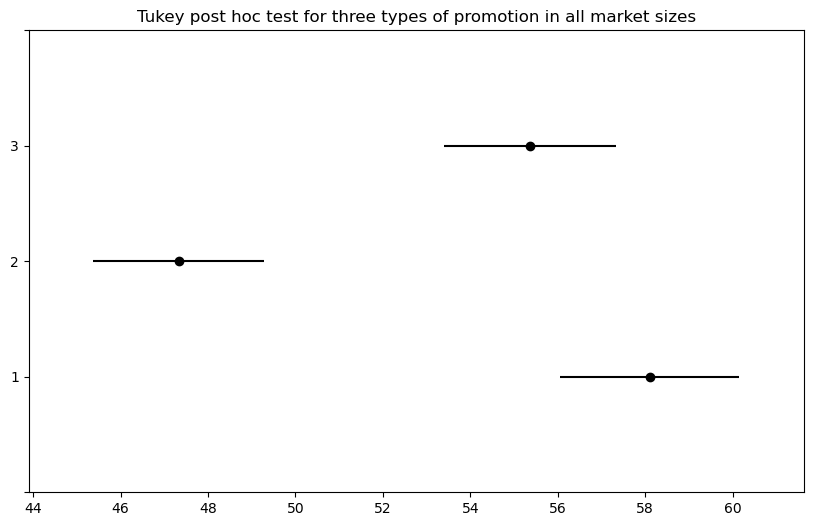

In [29]:
tukey = pairwise_tukeyhsd(endog=fast_food['SalesInThousands'], groups=fast_food['Promotion'], alpha=0.05)

tukey.plot_simultaneous()

plt.title("Tukey post hoc test for three types of promotion in all market sizes")
tukey.summary()

The Tukey post hoc test reveals a significant difference between Promotion 2 and the other promotions. However, no significant difference is observed between Promotions 1 and 3.

## Small Market Size

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-9.3519,0.0,-13.683,-5.0208,True
1,3,-0.6483,0.9161,-4.5579,3.2612,False
2,3,8.7035,0.0,4.5359,12.8712,True


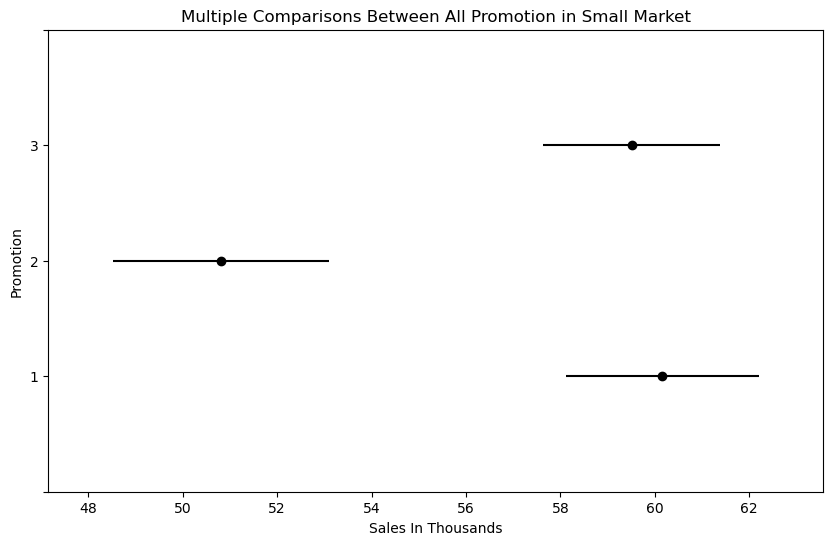

In [30]:
small = fast_food.loc[fast_food['MarketSize'] == 'Small', :]

tukey_small = pairwise_tukeyhsd(endog=small['SalesInThousands'], groups=small['Promotion'], alpha=0.05)
tukey_small.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Small Market")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")

tukey_small.summary()

## Medium Market Size

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-8.5583,0.0,-11.3107,-5.8058,True
1,3,-2.2037,0.1356,-4.9111,0.5037,False
2,3,6.3545,0.0,3.7307,8.9783,True


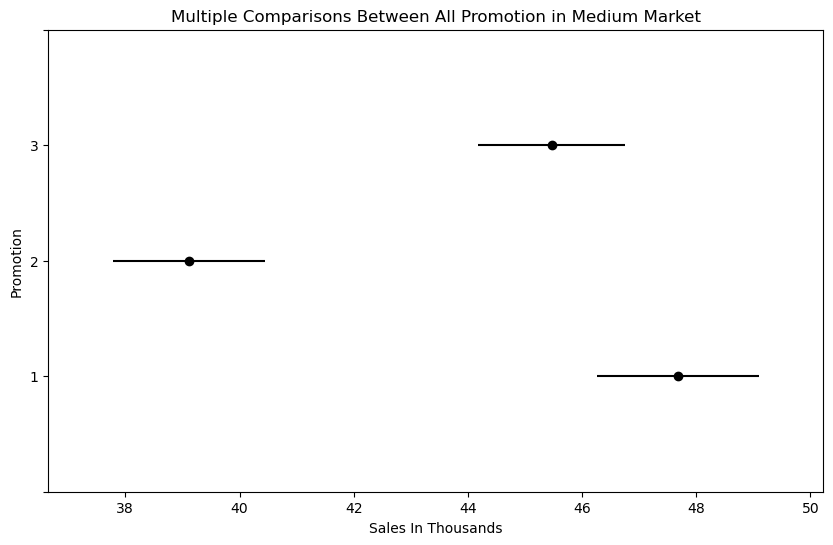

In [31]:
medium = fast_food.loc[fast_food['MarketSize'] == 'Medium', :]

tukey_medium = pairwise_tukeyhsd(endog=medium['SalesInThousands'], groups=medium['Promotion'], alpha=0.05)
tukey_medium.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Medium Market")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")

tukey_medium.summary()  

## Large Market Size

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-14.9139,0.0,-21.5279,-8.2998,True
1,3,1.9681,0.79,-5.1418,9.078,False
2,3,16.8819,0.0,9.9802,23.7837,True


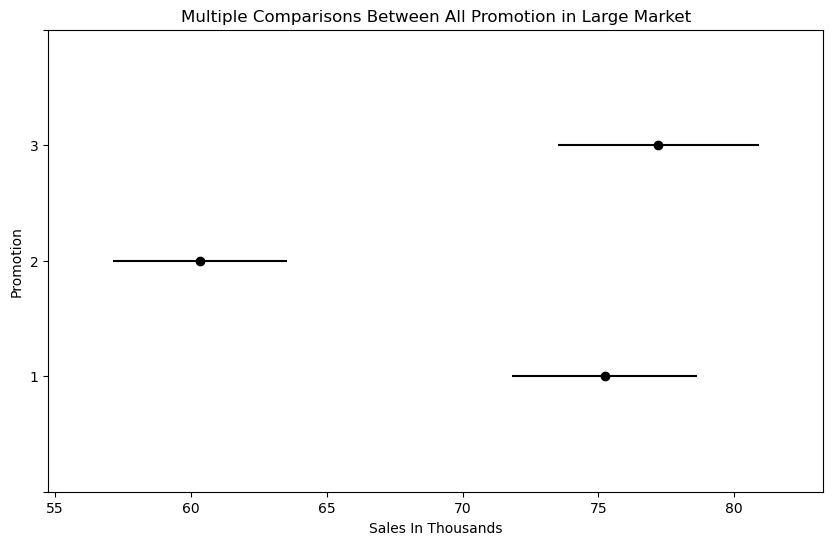

In [32]:
large = fast_food.loc[fast_food['MarketSize'] == 'Large', :]

tukey_large = pairwise_tukeyhsd(endog=large['SalesInThousands'], groups=large['Promotion'], alpha=0.05)  

tukey_large.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Large Market")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")

tukey_large.summary() 

The ANOVA and post hoc test results for markets of different sizes—small, medium, and large—align closely with the findings from the overall analysis. This consistency indicates that the observed patterns and statistical significance in sales performance across the three promotions hold true across all market size categories.

# Confidence Intervals

**Analytical Method - Estimating the Population Mean with Confidence**

In [33]:
ci_results = [
    func.ci_mean_analytical(data=fast_food[fast_food['Promotion'] == i]['SalesInThousands'])
    for i in range(1, 4)
]

ci_df_analytical = pd.DataFrame(ci_results, columns=['Mean', 'CI Lower', 'CI Upper'])
ci_df_analytical['Promotion'] = ['Promotion 1', 'Promotion 2', 'Promotion 3']
ci_df_analytical = ci_df_analytical[['Promotion', 'Mean', 'CI Lower', 'CI Upper']]

ci_df_analytical

,Promotion,Mean,CI Lower,CI Upper
0,Promotion 1,58.099012,55.607485,60.590539
1,Promotion 2,47.329415,45.155596,49.503234
2,Promotion 3,55.364468,52.952207,57.776730


In [34]:
ci_results = [
    func.ci_bootstrap(data=fast_food[fast_food['Promotion'] == i]['SalesInThousands'])
    for i in range(1, 4)
]

ci_df_bootstrap = pd.DataFrame(ci_results, columns=['Mean', 'CI Lower', 'CI Upper'])
ci_df_bootstrap['Promotion'] = ['Promotion 1', 'Promotion 2', 'Promotion 3']
ci_df_bootstrap = ci_df_bootstrap[['Promotion', 'Mean', 'CI Lower', 'CI Upper']]

ci_df_bootstrap

,Promotion,Mean,CI Lower,CI Upper
0,Promotion 1,58.123121,55.537794,60.696760
1,Promotion 2,47.337197,45.276727,49.514040
2,Promotion 3,55.461231,53.207645,57.976052


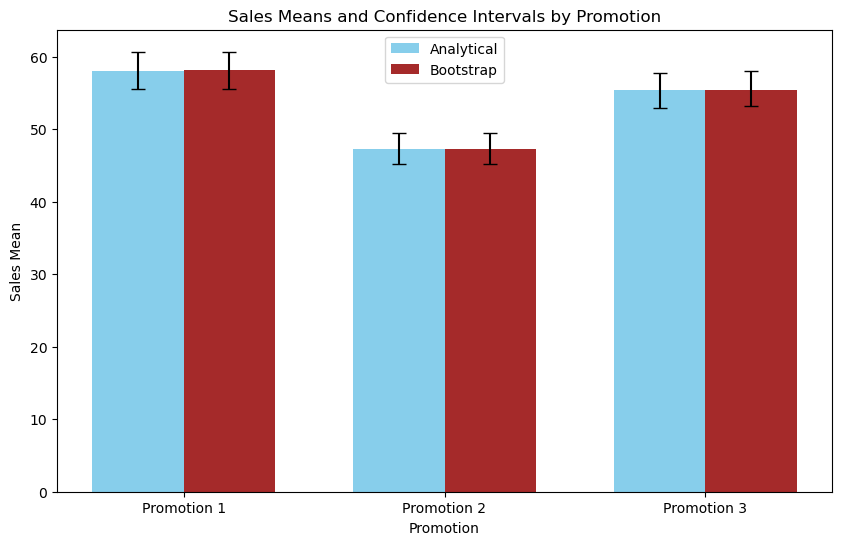

In [35]:
visuals.plot_with_error_bars(ci_df_analytical, ci_df_bootstrap)

Both the bootstrapping and analytical approaches produced similar confidence intervals.

# Decision

The statistical analysis shows that promotions 1 and 3 consistently produce higher average revenues compared to promotion 2 across all market sizes. Therefore, the organization might consider incorporating promotions 1 and 3 into its upcoming marketing strategies.

# Further Improvements

We can design and test multiple variations within each marketing campaign to pinpoint which specific features contribute the most to its success. For example, we could experiment with different elements such as ad wording, discount structures, visual designs, promotion channels, or timing. By systematically varying one feature at a time and analyzing the outcomes, we can determine which combinations are most effective in driving sales, customer engagement, and overall campaign performance. This approach allows for a deeper understanding of customer preferences and helps optimize future marketing strategies for maximum impact.